In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import ast

In [136]:
fs = 'hvg'
# task = 'V11L12-038_A1'
# task_name = "V11L12-038_A1"
task = 'neuro'
task_name = "neuro"

lipids = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/{task}/merged_results.tsv", sep='\t')
# lipids = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/{task}_half/merged_results.tsv", sep='\t')
lipids_rand = pd.read_csv(f"/lustre/groups/ml01/workspace/eirini/pipeline/data/reports/{task}_rand/merged_results.tsv", sep='\t')

merged_df = pd.concat([lipids, lipids_rand], ignore_index=True)


In [137]:
df = merged_df.copy()
df = df[df["featsel"] == fs]


In [138]:
# --- INPUT ---
# df = pd.read_csv("your_file.tsv", sep="\t")
df['method_params'] = df['method_params'].apply(ast.literal_eval)

# --- BEST MODELS PER METRIC ---
metrics = ['rmse', 'pearson', 'r2']
best_models = {}

for metric in metrics:
    best_rows = []
    for task in df['task'].unique():
        task_df = df[df['task'] == task]
        if metric == 'rmse':
            best_row = task_df.loc[task_df[metric].idxmin()]
        else:  # maximize for pearson and spearman
            best_row = task_df.loc[task_df[metric].idxmax()]
        best_rows.append(best_row)
    best_models[metric] = pd.DataFrame(best_rows)

# --- OUTPUT ---
# print("Best RMSE models:")
# print(best_models['rmse'])

# print("Best Pearson models:")
# print(best_models['pearson'])

# print("Best r2 models:")
# print(best_models['r2'])


In [139]:
best_models

{'rmse':          rmse       mae        r2   pearson  spearman        task  \
 87   0.437031  0.262501  0.002273  0.901875  0.523227       neuro   
 474  0.435352  0.258982  0.011804  0.903987  0.521109  neuro_rand   
 
      method_name featsel                                      method_params  \
 87   elastic_net     hvg                    {'alpha': 0.1, 'l1_ratio': 0.5}   
 474      xgboost     hvg  {'alpha': 45, 'lambda': 95, 'max_depth': 3, 'l...   
 
            hash  
 87   e7f6346838  
 474  9f4b77aea6  ,
 'pearson':          rmse       mae        r2   pearson  spearman        task method_name  \
 147  0.437318  0.265587 -0.000598  0.901941  0.518468       neuro     xgboost   
 474  0.435352  0.258982  0.011804  0.903987  0.521109  neuro_rand     xgboost   
 
     featsel                                      method_params        hash  
 147     hvg  {'alpha': 50, 'lambda': 90, 'max_depth': 3, 'l...  c1f032468f  
 474     hvg  {'alpha': 45, 'lambda': 95, 'max_depth': 3, 'l...  

In [140]:
# box_df = df[~df["method_name"].isin(["linear", "ridge", "cvae"])].copy()
# box_df = df[~df["method_name"].isin(["linear","ridge"])].copy()
# box_df = df[~df["method_name"].isin(["linear"])].copy()
box_df = df.copy()

In [141]:
box_df

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.898413,0.690353,-3.312081,0.689995,0.388340,neuro,ridge,hvg,{'alpha': 1.0},db1ba0d72b
1,1.138663,0.876337,-5.962375,0.598923,0.349537,neuro,ridge,hvg,{'alpha': 0.1},330aae40b1
2,0.503492,0.340136,-0.331635,0.870967,0.487844,neuro,ridge,hvg,{'alpha': 100.0},e64bc02e07
3,1.208730,0.928657,-6.856121,0.575597,0.339904,neuro,ridge,hvg,{'alpha': 0.01},34cdc187c8
4,0.478633,0.311286,-0.201553,0.882697,0.497548,neuro,ridge,hvg,{'alpha': 200.0},c59699e880
...,...,...,...,...,...,...,...,...,...,...
581,0.482920,0.273651,-0.128037,0.892716,0.511615,neuro_rand,gnn,hvg,"{'hidden_dim': 896, 'lr': 0.0001, 'epochs': 40...",252eb7826b
582,0.481546,0.270227,-0.131306,0.893899,0.514558,neuro_rand,gnn,hvg,"{'hidden_dim': 640, 'lr': 0.0003, 'epochs': 27...",d6515cf6d1
583,0.475431,0.272083,-0.116463,0.898004,0.517450,neuro_rand,gnn,hvg,"{'hidden_dim': 512, 'lr': 0.0002, 'epochs': 25...",4abaec636f
584,0.482643,0.272105,-0.137122,0.891725,0.513110,neuro_rand,gnn,hvg,"{'hidden_dim': 1024, 'lr': 0.00012, 'epochs': ...",3db9ba8763


/tmp/ipykernel_2449290/70224945.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2449290/70224945.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, fontweight='bold')
/tmp/ipykernel_2449290/70224945.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2449290/70224945.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, fontweight='bold')
/tmp/ipykernel_2449290/70224945.py:51: FutureWarning: 

Passing `palette` without as

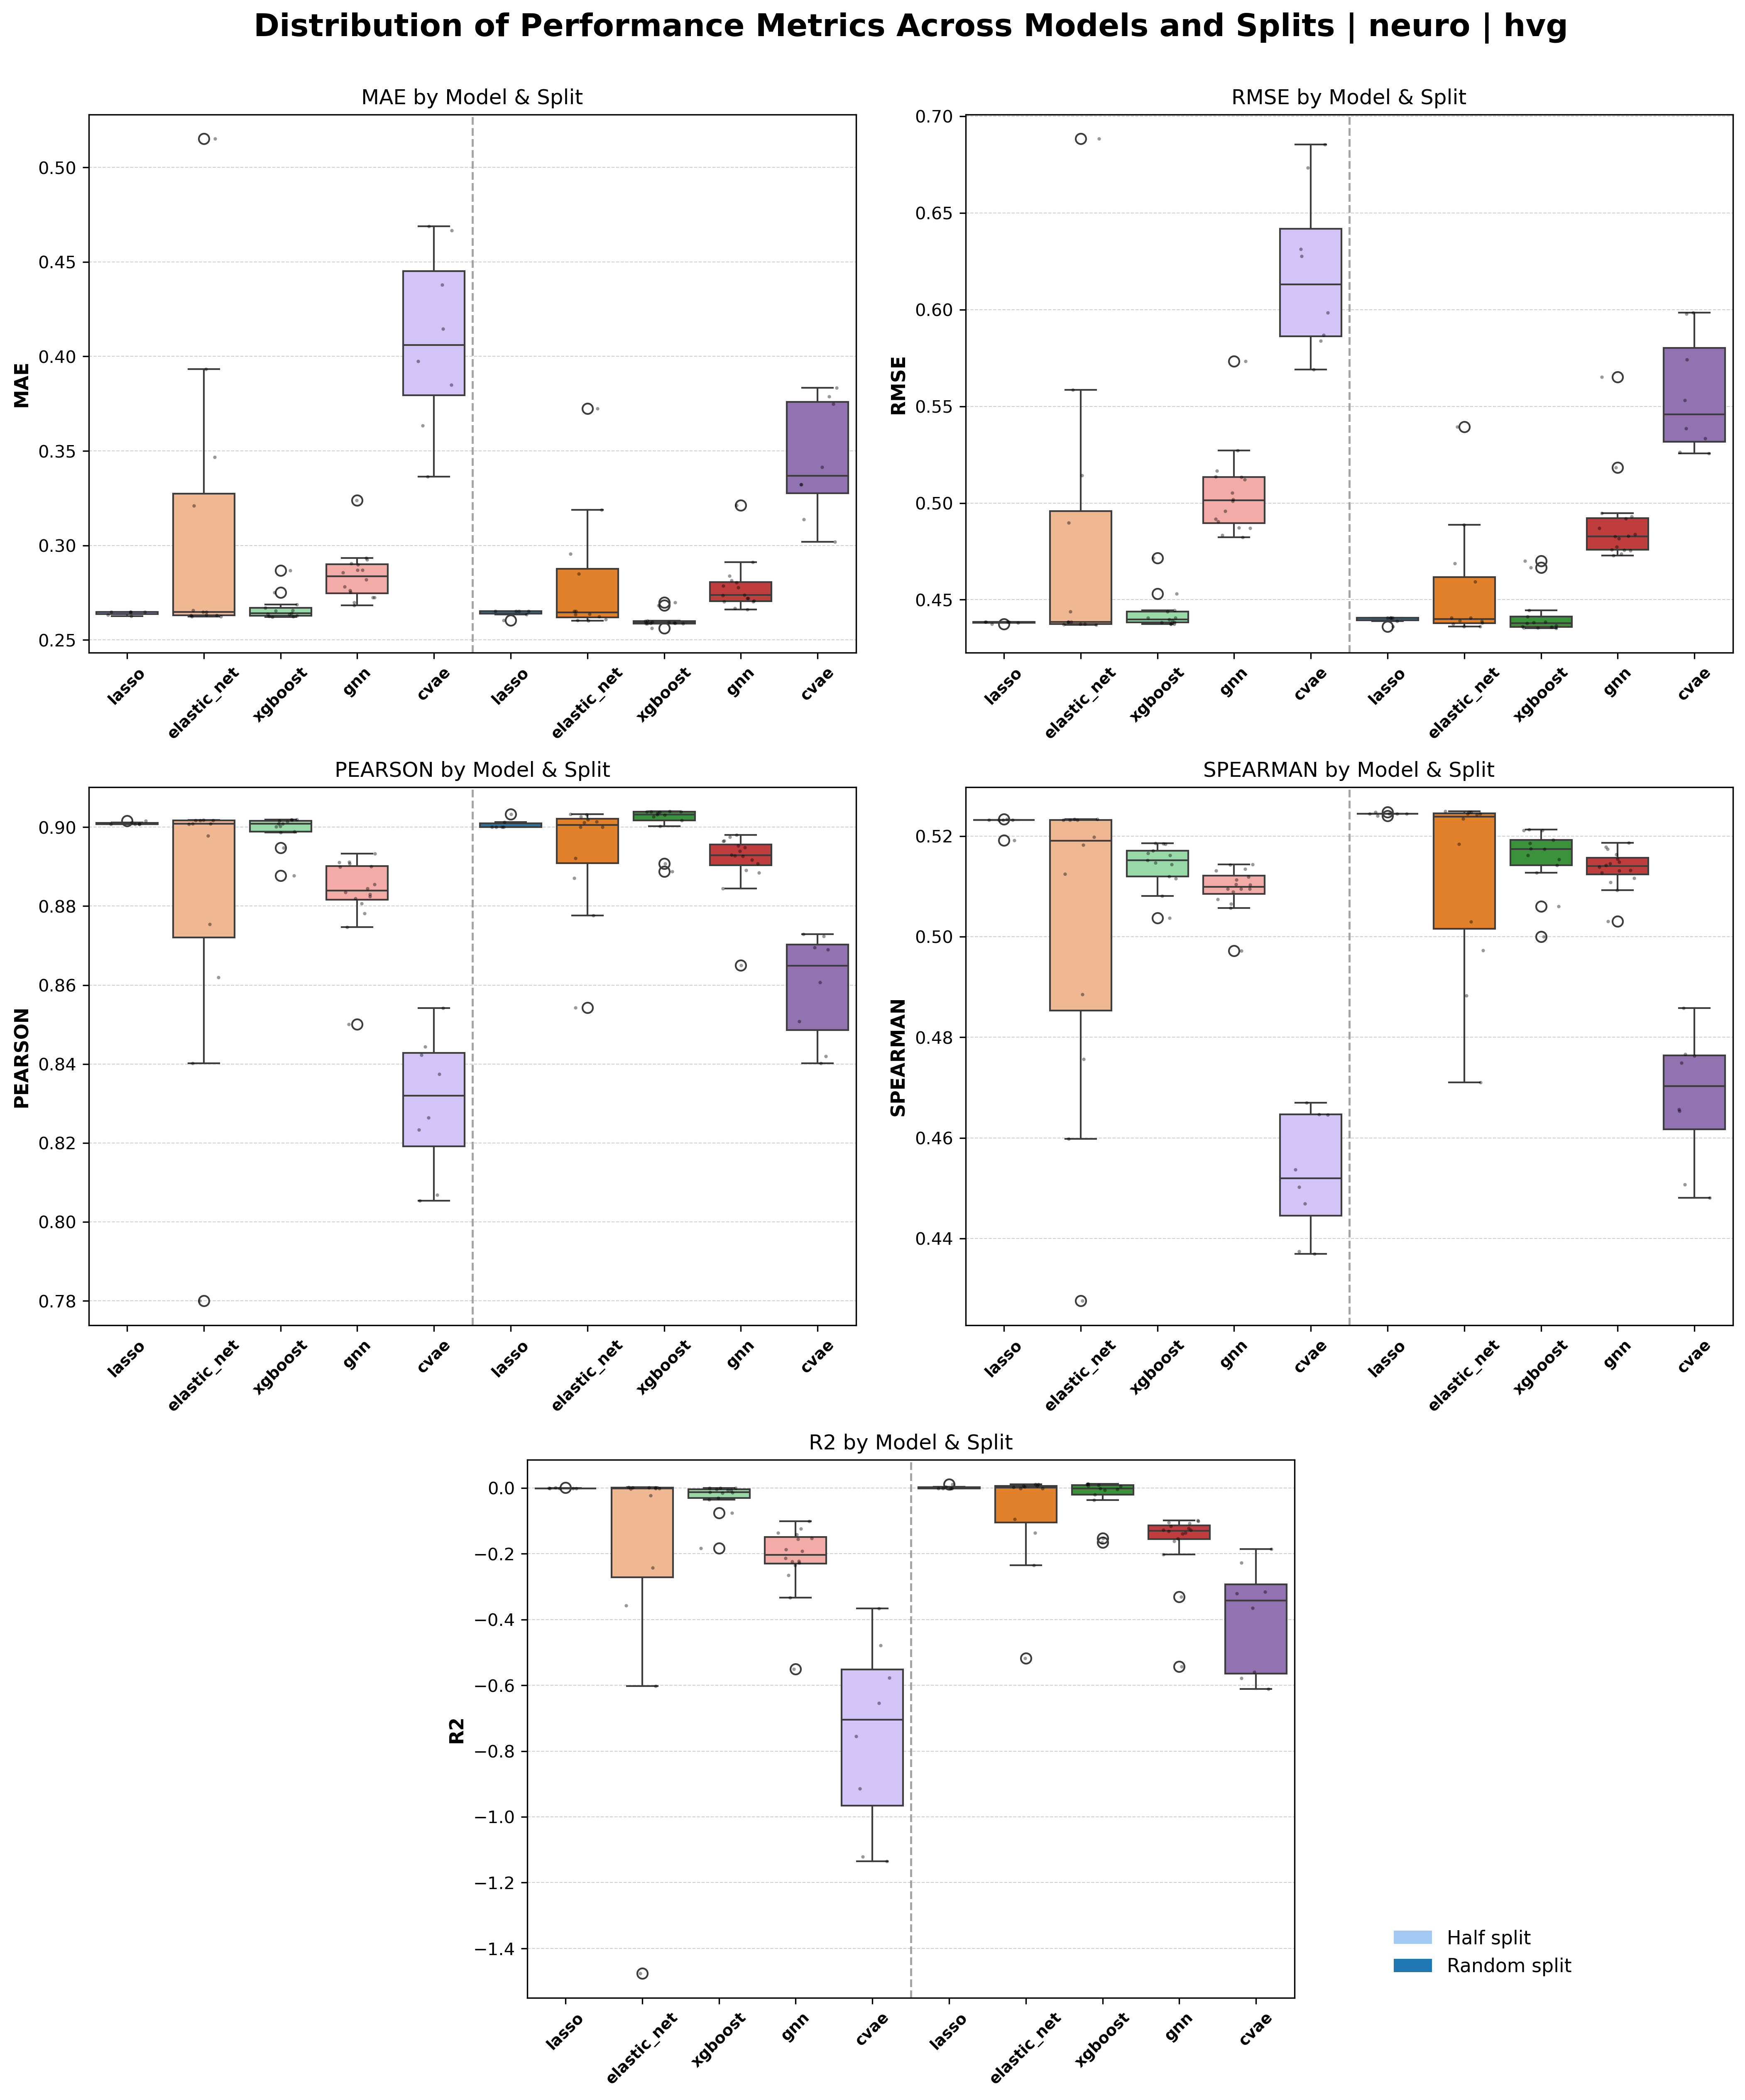

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Preprocessing ---
# Identify split type: 'base' or 'rand'
box_df['split'] = box_df['task'].apply(lambda x: 'rand' if 'rand' in x else 'base')

# Filter and select
# box_df = box_df[~box_df["method_name"].isin(["linear"])]
metrics = ['mae', 'rmse', 'pearson', 'spearman', 'r2']
# model_order = ['lasso', 'elastic_net', 'xgboost', 'gnn']
# model_order = ['linear','ridge','lasso', 'elastic_net', 'xgboost', 'gnn', 'cvae']
model_order = ['lasso', 'elastic_net', 'xgboost', 'gnn', 'cvae']

split_order = ['base', 'rand']

# --- Create split-aware plotting column for grouping ---
box_df['model_split'] = box_df['method_name'] + '_' + box_df['split']
model_split_order = [f'{m}_{s}' for s in split_order for m in model_order]
model_labels = model_order * len(split_order)  # for x-tick relabeling

# Define split-based color palette
base_palette = sns.color_palette("pastel", n_colors=len(model_order))  # soft for base
rand_palette = sns.color_palette("tab10", n_colors=len(model_order))  # bold for rand
palette = {
    f'{m}_base': base_palette[i] for i, m in enumerate(model_order)
}
palette.update({
    f'{m}_rand': rand_palette[i] for i, m in enumerate(model_order)
})

# --- Layout config ---
fig = plt.figure(figsize=(22, 18), dpi=300)
plt.subplots_adjust(left=0.05, right=0.98, top=0.93, bottom=0.06)

# Axes positions
positions = {
    'mae': (0.05, 0.66),
    'rmse': (0.37, 0.66),
    'pearson': (0.05, 0.36),
    'spearman': (0.37, 0.36),
    'r2': (0.21, 0.06),
}
w, h = 0.28, 0.24

# --- Plot ---
for metric in metrics:
    left, bottom = positions[metric]
    ax = fig.add_axes([left, bottom, w, h])

    sns.boxplot(
        data=box_df,
        x='model_split',
        y=metric,
        ax=ax,
        order=model_split_order,
        palette=palette,
        dodge=False
    )
    sns.stripplot(
        data=box_df,
        x='model_split',
        y=metric,
        ax=ax,
        order=model_split_order,
        color='black',
        size=2,
        jitter=0.25,
        alpha=0.4
    )

    ax.set_title(f"{metric.upper()} by Model & Split", fontsize=12)
    ax.set_xlabel("")  
    ax.set_ylabel(metric.upper(), fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', labelsize=9, rotation=45)
    ax.set_xticklabels(model_labels, fontweight='bold')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
    # Vertical split line between base and rand
    ax.axvline(x=len(model_order) - 0.5, color='gray', linestyle='--', linewidth=1.2, alpha=0.7)


# --- Centered Title ---
left_1 = 0.05
left_2 = 0.37
center = (left_1 + left_2 + w) / 2
fig.text(center, 0.935, f"Distribution of Performance Metrics Across Models and Splits | {task_name} | {fs}",
         ha='center', fontsize=18, fontweight='bold')

# --- Custom Legend for Splits ---
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=base_palette[0], label='Half split'),
    Patch(facecolor=rand_palette[0], label='Random split')
]

fig.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(0.52, 0.08),  # adjust as needed for perfect alignment
    frameon=False,
    fontsize=11
)

# fig.savefig(f"/lustre/groups/ml01/workspace/eirini/thesis_plots/viz/appendix/ap_{task_name}_{fs}_boxplots_split.png", dpi=300, bbox_inches="tight")
fig.savefig(f"/lustre/groups/ml01/workspace/eirini/thesis_plots/viz/{task_name}_{fs}_boxplots_split.png", dpi=300, bbox_inches="tight")

plt.show()


In [143]:
df

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.898413,0.690353,-3.312081,0.689995,0.388340,neuro,ridge,hvg,{'alpha': 1.0},db1ba0d72b
1,1.138663,0.876337,-5.962375,0.598923,0.349537,neuro,ridge,hvg,{'alpha': 0.1},330aae40b1
2,0.503492,0.340136,-0.331635,0.870967,0.487844,neuro,ridge,hvg,{'alpha': 100.0},e64bc02e07
3,1.208730,0.928657,-6.856121,0.575597,0.339904,neuro,ridge,hvg,{'alpha': 0.01},34cdc187c8
4,0.478633,0.311286,-0.201553,0.882697,0.497548,neuro,ridge,hvg,{'alpha': 200.0},c59699e880
...,...,...,...,...,...,...,...,...,...,...
581,0.482920,0.273651,-0.128037,0.892716,0.511615,neuro_rand,gnn,hvg,"{'hidden_dim': 896, 'lr': 0.0001, 'epochs': 40...",252eb7826b
582,0.481546,0.270227,-0.131306,0.893899,0.514558,neuro_rand,gnn,hvg,"{'hidden_dim': 640, 'lr': 0.0003, 'epochs': 27...",d6515cf6d1
583,0.475431,0.272083,-0.116463,0.898004,0.517450,neuro_rand,gnn,hvg,"{'hidden_dim': 512, 'lr': 0.0002, 'epochs': 25...",4abaec636f
584,0.482643,0.272105,-0.137122,0.891725,0.513110,neuro_rand,gnn,hvg,"{'hidden_dim': 1024, 'lr': 0.00012, 'epochs': ...",3db9ba8763


In [144]:
heat_df = df.copy()

In [145]:
heat_df

,rmse,mae,r2,pearson,spearman,task,method_name,featsel,method_params,hash
0,0.898413,0.690353,-3.312081,0.689995,0.388340,neuro,ridge,hvg,{'alpha': 1.0},db1ba0d72b
1,1.138663,0.876337,-5.962375,0.598923,0.349537,neuro,ridge,hvg,{'alpha': 0.1},330aae40b1
2,0.503492,0.340136,-0.331635,0.870967,0.487844,neuro,ridge,hvg,{'alpha': 100.0},e64bc02e07
3,1.208730,0.928657,-6.856121,0.575597,0.339904,neuro,ridge,hvg,{'alpha': 0.01},34cdc187c8
4,0.478633,0.311286,-0.201553,0.882697,0.497548,neuro,ridge,hvg,{'alpha': 200.0},c59699e880
...,...,...,...,...,...,...,...,...,...,...
581,0.482920,0.273651,-0.128037,0.892716,0.511615,neuro_rand,gnn,hvg,"{'hidden_dim': 896, 'lr': 0.0001, 'epochs': 40...",252eb7826b
582,0.481546,0.270227,-0.131306,0.893899,0.514558,neuro_rand,gnn,hvg,"{'hidden_dim': 640, 'lr': 0.0003, 'epochs': 27...",d6515cf6d1
583,0.475431,0.272083,-0.116463,0.898004,0.517450,neuro_rand,gnn,hvg,"{'hidden_dim': 512, 'lr': 0.0002, 'epochs': 25...",4abaec636f
584,0.482643,0.272105,-0.137122,0.891725,0.513110,neuro_rand,gnn,hvg,"{'hidden_dim': 1024, 'lr': 0.00012, 'epochs': ...",3db9ba8763


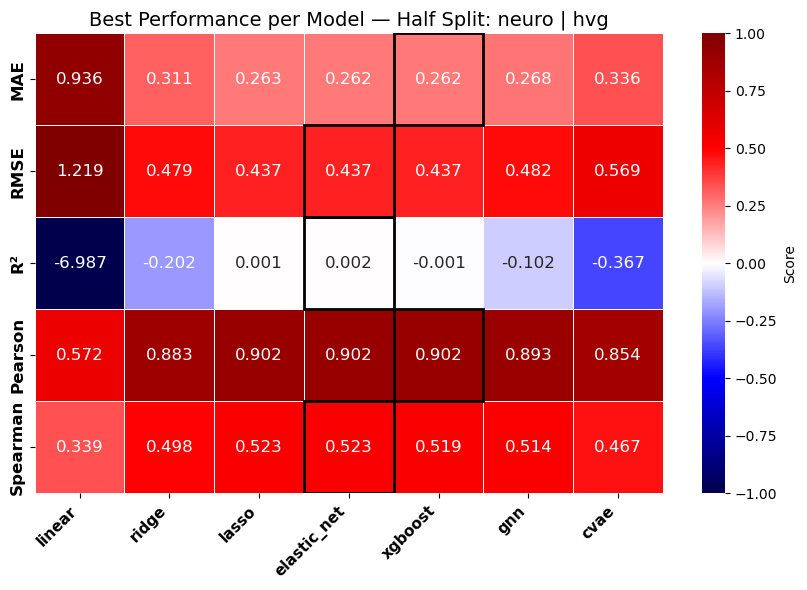

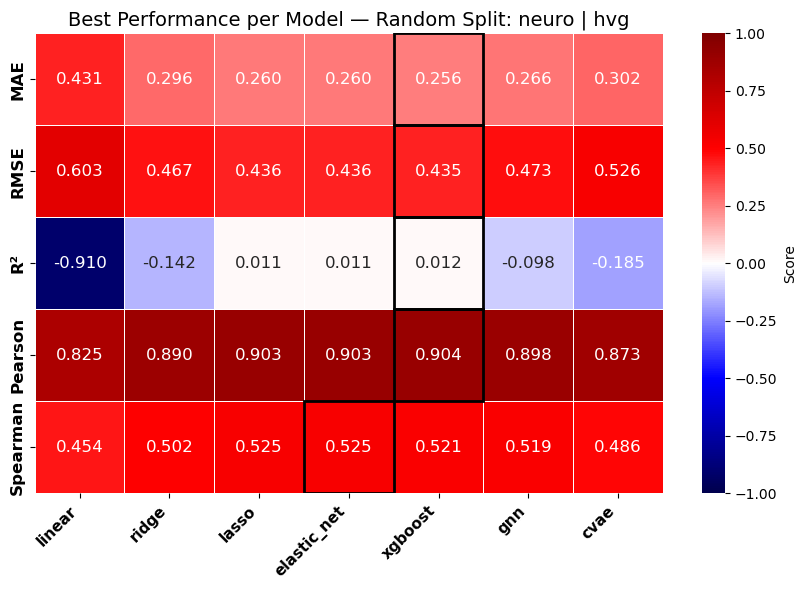

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------
# CONFIGURATION
# --------------------
metrics = ['rmse', 'mae', 'r2', 'pearson', 'spearman']
best_direction = {
    'r2': 'max',
    'mae': 'min',
    'rmse': 'min',
    'pearson': 'max',
    'spearman': 'max'
}

# Nice display names for rows
metric_order = ['mae', 'rmse', 'r2', 'pearson', 'spearman']
metric_display = {
    'mae': 'MAE',
    'rmse': 'RMSE',
    'r2': 'R²',
    'pearson': 'Pearson',
    'spearman': 'Spearman'
}

# --------------------
# PREPROCESSING
# --------------------
heat_df['split'] = heat_df['task'].apply(lambda x: 'rand' if 'rand' in x else 'base')

# Collect best run per method and split for each metric
best_rows = []
for metric in metrics:
    if best_direction[metric] == 'min':
        best = heat_df.loc[heat_df.groupby(['method_name', 'split'])[metric].idxmin()]
    else:
        best = heat_df.loc[heat_df.groupby(['method_name', 'split'])[metric].idxmax()]
    
    temp = best[['method_name', 'split', metric]].copy()
    temp['metric'] = metric
    temp = temp.rename(columns={metric: 'value'})
    best_rows.append(temp)

# Combine results
summary_df = pd.concat(best_rows)

# Pivot so metrics are rows
base_df = summary_df[summary_df['split'] == 'base'].pivot(index='metric', columns='method_name', values='value')
rand_df = summary_df[summary_df['split'] == 'rand'].pivot(index='metric', columns='method_name', values='value')

# Reorder rows (metrics)
base_df = base_df.reindex(metric_order)
rand_df = rand_df.reindex(metric_order)
base_df.index = base_df.index.map(metric_display)
rand_df.index = rand_df.index.map(metric_display)

# Reorder columns (models)
model_order = ['linear', 'ridge', 'lasso', 'elastic_net', 'xgboost', 'gnn', 'cvae']
base_df = base_df[model_order]
rand_df = rand_df[model_order]

# --------------------
# PLOTTING FUNCTION
# --------------------
def plot_heatmap(df, title, cmap="seismic", vmin=None, vmax=None, save_path=None):
    # plt.figure(figsize=(10, len(df) * 0.6))
    # plt.figure(figsize=(1.2 * df.shape[1], 1.2 * df.shape[0]))
    plt.figure(figsize=(1.2 * df.shape[1], 6))  # Width scales, height fixed


    ax = sns.heatmap(
    df,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
    cbar_kws={'label': 'Score'},
    annot_kws={'size': 12}  # 👈 Adjust this as needed
    )


    # Highlight best performers per metric (row)
    for row_idx, metric in enumerate(df.index):
        values = df.loc[metric]
        if metric in ['MAE', 'RMSE']:  # lower is better
            best_col = values.idxmin()
        else:  # higher is better
            best_col = values.idxmax()
        col_idx = df.columns.get_loc(best_col)

        # Draw rectangle around the best cell
        ax.add_patch(plt.Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='black', linewidth=2))

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold', rotation=45, ha='right')
    plt.title(title, fontsize=14)
    plt.ylabel("")
    plt.xlabel("")
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

# --------------------
# PLOT
# --------------------

save_root = "/lustre/groups/ml01/workspace/eirini/thesis_plots/viz"

# Format-safe filename prefix
prefix = f"{task_name}_{fs}".replace(" ", "_")

# Save both heatmaps with formatted names
plot_heatmap(
    base_df,
    f"Best Performance per Model — Half Split: {task_name} | {fs}",
    cmap="seismic",
    vmin=-1,
    vmax=1,
    save_path=f"{save_root}/{prefix}_half_perf_heatmap.png"
)

plot_heatmap(
    rand_df,
    f"Best Performance per Model — Random Split: {task_name} | {fs}",
    cmap="seismic",
    vmin=-1,
    vmax=1,
    save_path=f"{save_root}/{prefix}_rand_perf_heatmap.png"
)

# plot_heatmap(base_df, f"Best Performance per Model — Half Split: {task_name} | {fs}", cmap="seismic", vmin=-1, vmax=1)
# plot_heatmap(rand_df, f"Best Performance per Model — Random Split: {task_name} | {fs}", cmap="seismic", vmin=-1, vmax=1)


In [147]:
df['task'].unique()

array(['neuro', 'neuro_rand'], dtype=object)

## Metrics correlations for both splits

In [148]:

# Filter for selected feature selection strategy
corrz_df = df.copy()
corrz_df = corrz_df[~df["method_name"].isin(["linear", "cvae", "ridge", "gnn"])].copy()

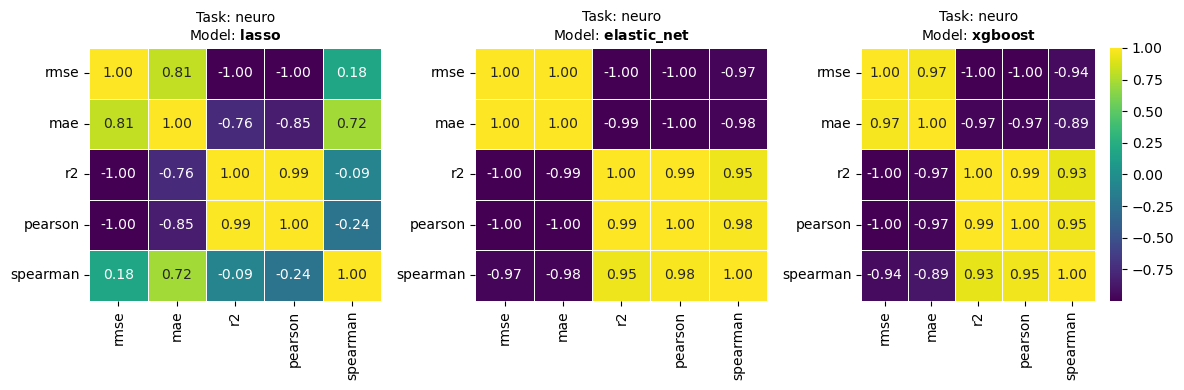

Saved: /lustre/groups/ml01/workspace/eirini/thesis_plots/viz/neuro_hvg_half_metrics_corr.png


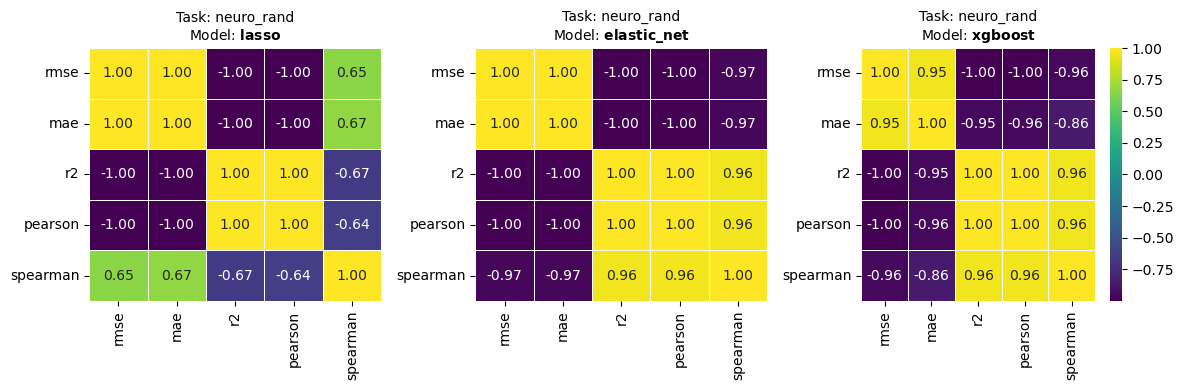

Saved: /lustre/groups/ml01/workspace/eirini/thesis_plots/viz/neuro_hvg_rand_metrics_corr.png


In [149]:
# Extract 'split' type from task name
corrz_df['split'] = corrz_df['task'].apply(lambda x: 'rand' if 'rand' in x else 'half')

# For each split (half / rand), make plots
for split in ['half', 'rand']:
    plot_df = corrz_df[corrz_df['split'] == split]
    tasks = plot_df['task'].unique()
    models = plot_df['method_name'].unique()

    n_tasks = len(tasks)
    n_models = len(models)

    fig, axes = plt.subplots(n_tasks, n_models, figsize=(n_models * 4, n_tasks * 4), squeeze=False)

    for i, task in enumerate(tasks):
        for j, model in enumerate(models):
            subset = plot_df[(plot_df['task'] == task) & (plot_df['method_name'] == model)]

            if subset.empty:
                axes[i][j].axis('off')
                continue

            metrics = subset[['rmse', 'mae', 'r2', 'pearson', 'spearman']]
            corr_matrix = metrics.corr()

            sns.heatmap(corr_matrix,
                        annot=True,
                        cmap='viridis',
                        fmt=".2f",
                        linewidths=0.5,
                        cbar=(j == n_models - 1),
                        ax=axes[i][j])
            
            safe_model = model.replace('_', r'\_')
            axes[i][j].set_title(f"Task: {task}\nModel: " + r"$\bf{" + safe_model + "}$", fontsize=10)

    plt.tight_layout()
    outpath = f"/lustre/groups/ml01/workspace/eirini/thesis_plots/viz/{task_name}_{fs}_{split}_metrics_corr.png"
    plt.savefig(outpath, dpi=300, bbox_inches="tight")
    # plt.close()
    plt.show()
    print(f"Saved: {outpath}")
